In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Task:
1. Count the number of rows 

2. Count the number columns (list all the columns)

3. See if there're any null (na) values in the dataset

4. How many of them (columns) are categorical and continuous? List them.

<b>Visualization:</b>

1. See how Income is distributed according to Occupation 

2. Distribution of age group (histogram)

3. Number of male and female 

4. Separate male and female according to the income 

<b>Challenging Task:</b>

1. In country the column name '?' replace it with 'USA'

- Check whether other column contain '?', if there's replace it with '99999'

2. For occupation column, I want you to change it to int. You can do that by encoding (1, 2, 3)

In [2]:
df = pd.read_csv('adult.0.train')
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss', 'hours-per-week','native-country','income']

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,30,Private,96287,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
1,21,Private,314182,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,19,Private,156618,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,1602,20,United-States,<=50K
3,30,Private,118056,Some-college,10,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,<=50K
4,57,Private,34366,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K


In [4]:
# 1. Number of rows in df
len(df)

24420

In [5]:
# 2. Count the Number of columns and list out the columns
df.columns , len(df.columns)

(Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'income'],
       dtype='object'),
 15)

In [6]:
# 3. Check if the data set has any null values
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
gender            False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,30,Private,96287,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
1,21,Private,314182,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,19,Private,156618,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,1602,20,United-States,<=50K
3,30,Private,118056,Some-college,10,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,<=50K
4,57,Private,34366,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K


In [8]:
# 4. How many features are categorical and continuous?
# - continuous features
list(df.describe().columns)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [9]:
# - categorical features
list(set(df.columns) - set(df.describe().columns))

['race',
 'occupation',
 'gender',
 'relationship',
 'education',
 'income',
 'marital-status',
 'workclass',
 'native-country']

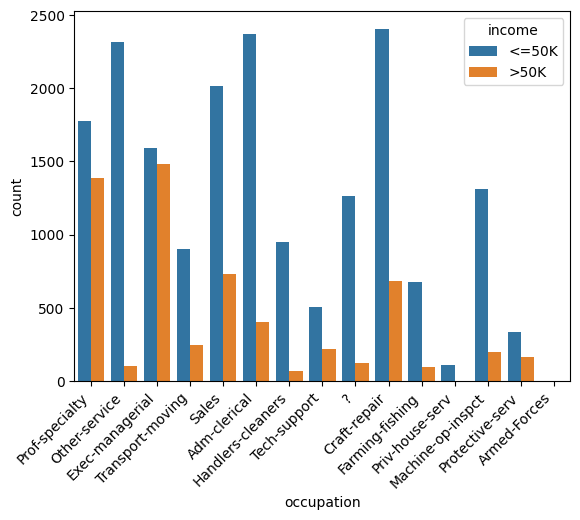

In [10]:
# VISUALIZATION
# 1. See how Income is distributed according to Occupation 
sns.countplot(data = df, x='occupation', hue='income')
plt.xticks(rotation = 45, ha = 'right');

<Axes: xlabel='age', ylabel='Count'>

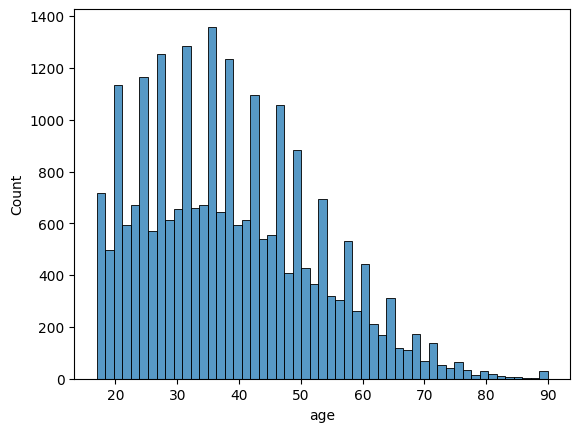

In [11]:
# 2. Distribution of age group (histogram)
sns.histplot(df['age'])

In [12]:
# 3. Number of male and females
df['gender'].value_counts()

gender
Male      16378
Female     8042
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

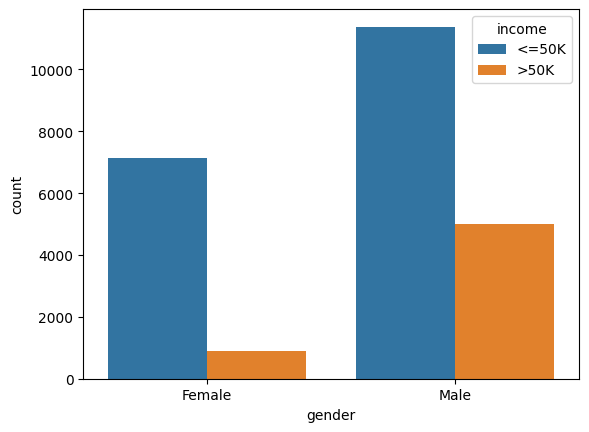

In [13]:
# 4. Separate male and female acq to income
sns.countplot(data = df, x= 'gender', hue = 'income')

In [14]:
# Challenging task
# 1. replacing country '?' with USA
df['native-country'].replace('?', 'United-States', inplace=True)

In [15]:
# 2.- Check whether other column contain '?', if there's replace it with '99999'
(df=='?').any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
gender            False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [16]:
df_new = (df=='?').replace('?', '99999')

In [17]:
# 2. For occupation column, I want you to change it to int. You can do that by encoding (1, 2, 3)
df['occupation'].value_counts()

occupation
Prof-specialty       3161
Craft-repair         3087
Exec-managerial      3073
Adm-clerical         2778
Sales                2749
Other-service        2417
Machine-op-inspct    1508
?                    1384
Transport-moving     1149
Handlers-cleaners    1017
Farming-fishing       769
Tech-support          720
Protective-serv       495
Priv-house-serv       111
Armed-Forces            2
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df['occupation'].astype('category')

0          Prof-specialty
1           Other-service
2           Other-service
3         Exec-managerial
4        Transport-moving
               ...       
24415                   ?
24416                   ?
24417    Transport-moving
24418     Exec-managerial
24419        Adm-clerical
Name: occupation, Length: 24420, dtype: category
Categories (15, object): ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', ..., 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

In [20]:
le = LabelEncoder()
le.fit(df['occupation'])

LabelEncoder()

In [21]:
df['occupation']=le.transform(df['occupation'])

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,30,Private,96287,Masters,14,Never-married,10,Not-in-family,White,Female,0,0,45,United-States,<=50K
1,21,Private,314182,HS-grad,9,Never-married,8,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,19,Private,156618,HS-grad,9,Never-married,8,Own-child,White,Female,0,1602,20,United-States,<=50K
3,30,Private,118056,Some-college,10,Married-spouse-absent,4,Unmarried,White,Female,0,0,45,United-States,<=50K
4,57,Private,34366,Some-college,10,Married-civ-spouse,14,Husband,White,Male,0,0,50,United-States,<=50K
